# Diplomatura en ciencia de datos, aprendizaje automático y sus aplicaciones - Edición 2023 - FAMAF (UNC)

## Mentoría 16 - ¿Cómo identificar fuga de ventas? Inteligencia artificial aplicada al sector comercial.

### Análisis y visualización de datos (TP1 - Parte 1: Exploración inicial)

**Integrantes:**
- Canalis, Patricio.
- Chevallier-Boutell, Ignacio José.
- Villarroel Torrez, Daniel.

**Mentores:**
- Gonzalez, Lucía
- Lahoz, Nahuel

---

## Librerías

In [4]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

import json

## Dataset

In [5]:
# Está la URL del archivo hosteado, pero también está el path relativo dentro de este proyecto 
# donde se escribió el data set al final del notebook `resolucion01.ipynb` 

# url = 'https://www.dropbox.com/scl/fi/iaagjtks3apflrywvomuv/muestra_diplodatos_ventas_2023.csv?dl=1&rlkey=zfsh0bnwbomd4g56bcjysytiy'
# ventas = pd.read_csv(url)
path = '../../data/raw/muestra_diplodatos_ventas_2023.csv'
ventas = pd.read_csv(path)

/tmp/ipykernel_271535/3190639961.py:7: DtypeWarning: Columns (10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  ventas = pd.read_csv(path)


In [6]:
print('Las columnas que arrojan el warning son:')
for col in [10, 11, 13]:
    print(f'\t{ventas.columns[col]}')

Las columnas que arrojan el warning son:
	TRATAMIENTO_FISCAL
	DESC_TRATAMIENTO_FISCAL
	CM04


---
# Variables

### Tamaño, nombres y tipo

In [7]:
print(f'Hay un total de {ventas.shape[0]} registros y un total de {ventas.shape[1]} variables:')
tipo_rev = ['string', 'entero', 'entero', 'entero', 'string', 'entero', 
            'string', 'flotante', 'flotante', 'flotante', 'string', 'string', 
            'string', 'string', 'string', 'string', 'string', 'entero', 'entero']

vartype = pd.DataFrame({'Variable': ventas.columns, 
                        'Tipo según Pandas': ventas.dtypes, 
                        'Tipo revisado': tipo_rev}).set_index('Variable').sort_values('Tipo revisado')
vartype

Hay un total de 431506 registros y un total de 19 variables:


,Tipo según Pandas,Tipo revisado
Variable,,
MODELO,int64,entero
INSCRIPCION,int64,entero
AÑO,int64,entero
MES,int64,entero
OMEGA,int64,entero
DEPOSITO,int64,entero
PORCENTAJE_COMISION_EMPRESA,float64,flotante
COMISION_EMPRESA,float64,flotante
TOTAL_VENTAS,float64,flotante


### Sneak peek

In [8]:
print('Todos los que son "object" en realidad son "str".')
display(ventas[:5])

Todos los que son "object" en realidad son "str".


,ID_VENDEDOR,INSCRIPCION,AÑO,MES,CATEGORIA,DEPOSITO,DESCRIPCION_CATEGORIA,TOTAL_VENTAS,PORCENTAJE_COMISION_EMPRESA,COMISION_EMPRESA,TRATAMIENTO_FISCAL,DESC_TRATAMIENTO_FISCAL,TRATAMIENTO_DIFERNCIAL,CM04,CATEGORIA (Ajustado),SUB-CATEGORIA,NOMBRE,OMEGA,MODELO
0,0520ed45f48b92cf903130d467021c242be8045cfed4ab...,270417671,2019,1,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,469090,Venta al por mayor de mercancías n.c.p.,14622.16,0.028,409.42,0.0,Normal,NaN,NaN,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"Venta de Artículos, productos, accesorios, etc...",d7fe2144f50da08790400f3fc5217b4a4c6042e05b5f2f...,1,0
1,95b704f66684b2101d104491983c7cf88455b04d4ecf8f...,270118305,2019,1,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,464129,Venta al por mayor de prendas y accesorios de ...,62477.00,0.040,2499.08,0.0,Normal,NaN,NaN,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"Venta de Artículos, productos, accesorios, etc...",fbadfc9f6105a8792048a825deb9801fa54106e21e8283...,1,0
2,95b704f66684b2101d104491983c7cf88455b04d4ecf8f...,270118305,2019,1,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,475190,Venta al por menor de artículos textiles n.c.p...,3373941.00,0.040,134957.64,0.0,Normal,NaN,NaN,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"Venta de Artículos, productos, accesorios, etc...",fbadfc9f6105a8792048a825deb9801fa54106e21e8283...,1,0
3,95b704f66684b2101d104491983c7cf88455b04d4ecf8f...,270118305,2019,1,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,477190,Venta al por menor de prendas y accesorios de ...,332660.00,0.040,13306.40,0.0,Normal,NaN,NaN,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"Venta de Artículos, productos, accesorios, etc...",fbadfc9f6105a8792048a825deb9801fa54106e21e8283...,1,0
4,1b6ef2976d38132a1df85b4199dcddd0158ab42c957184...,281129121,2019,1,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,469090,Venta al por mayor de mercancías n.c.p.,695685.00,0.040,27827.40,0.0,Normal,NaN,NaN,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,"Venta de Artículos, productos, accesorios, etc...",4c369e674e00fd385f3009dbc3825b8681112283301620...,1,0


### Datos faltantes

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

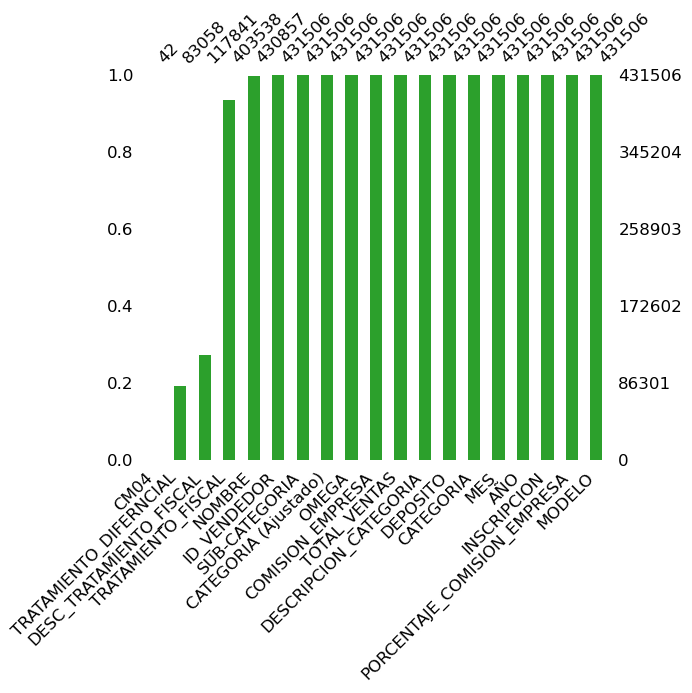

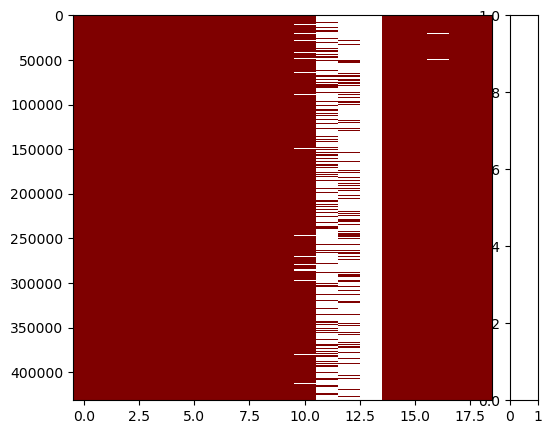

In [9]:
msno.bar(ventas.sort_values('ID_VENDEDOR'), sort="ascending", fontsize=12, color="tab:green", figsize=(6, 5))
msno.matrix(ventas.sort_values('ID_VENDEDOR'), fontsize=12, color=[0.5,0,0], figsize=(6, 5))
msno.heatmap(ventas.sort_values('ID_VENDEDOR'), fontsize=12, figsize=(6, 5))

plt.show()

### Problemas con tipo de datos

In [10]:
m = 10
print(ventas.columns[m])
a = ventas[ventas.columns[m]].value_counts()
for k in range(len(a)):
    if a[k].dtype != 'int64':
        print(a[k].dtype)

print('Si no hay nada impreso, es porque todas las variables son del tipo int64.')

TRATAMIENTO_FISCAL
Si no hay nada impreso, es porque todas las variables son del tipo int64.


In [11]:
m = 11
print(ventas.columns[m])
a = ventas[ventas.columns[m]].value_counts()
for k in range(len(a)):
    if a[k].dtype != 'int64':
        print(a[k].dtype)

print('Si no hay nada impreso, es porque todas las variables son del tipo int64.')

DESC_TRATAMIENTO_FISCAL
Si no hay nada impreso, es porque todas las variables son del tipo int64.


In [12]:
m = 13
print(ventas.columns[m])
a = ventas[ventas.columns[m]].value_counts()
for k in range(len(a)):
    if a[k].dtype != 'int64':
        print(a[k].dtype)

print('Si no hay nada impreso, es porque todas las variables son del tipo int64.')

CM04
Si no hay nada impreso, es porque todas las variables son del tipo int64.


### Cardinalidad: valores únicos

In [13]:
m = 0
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

ID_VENDEDOR
f679b20b02309cab33658571f0c8da237f57f732ab96978386a95c2776f07c21    0.386321
ec21dabdae55fb2168ff9b225db59e98b4731306282cc8314d6b0a39b0cd69b5    0.330934
c8237c3a8f089f0e8d5f47fe38f34fba1091868d1f64b3748970603e2d2c3f60    0.299185
ab4757eac54ed54acd482d387ec67488d3df1f4e6e9ef3d2d4797ebd242b7498    0.297794
c7c203782eda1914c60d9dcf10dc4756b5f654a49688b5bf5c955073c8990872    0.292696
d6888955057128f42d4f28d5770443e0615d5a6416a45e933544829ec3d503ab    0.275547
e85f8721c2cc17bb768b8b79a038ac0773c0af7612cda8e9297fe4f926b3426a    0.269058
6ca551c95db4030f37d7907b7a35f714459dee9140bd9561c774607313c9f67e    0.236381
dd29047f0ef72309dd7b362a36a643e2d454fc224c8048831131af7ac0db7279    0.233600
467839df31488a12b204a5f8e9526c85ff5dd4cd46f5ea2da3d685029e39a561    0.227807
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 2.85 %
Cardinalidad: 3209


In [14]:
m = 1
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

INSCRIPCION
9043011028    0.386321
9042454829    0.299185
9042481399    0.297794
9042481894    0.292696
250047380     0.275547
9042394521    0.269058
282229862     0.236381
9010597536    0.233600
9042474012    0.227807
9042489557    0.199765
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 2.72 %
Cardinalidad: 3345


In [15]:
m = 2
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

AÑO
2021    29.690201
2020    28.163455
2019    27.130330
2022    15.016014
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 100.00 %
Cardinalidad: 4


In [16]:
m = 3
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

MES
6     9.563482
5     9.531270
3     9.509022
1     9.508095
2     9.504619
4     9.493958
11    7.184605
12    7.175103
10    7.164211
9     7.146598
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 85.78 %
Cardinalidad: 12


In [17]:
m = 4
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

CATEGORIA
COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACION DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS    72.867816
COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACION DE VEHÍCULOS AUTOMOTORES Y MOTO            27.112949
COMERCIO POR MENOR                                                                           0.007416
COMERCIO POR MAYOR                                                                           0.006489
SERVICIOS PERSONALES Y DE LOS HOGARES                                                        0.005330
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 100.00 %
Cardinalidad: 5


In [18]:
m = 5
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

DEPOSITO
469090    5.213601
461099    3.157314
466932    3.118612
462131    2.637507
473001    2.598573
462120    2.277604
453100    2.077144
453291    1.932766
461011    1.887112
462190    1.734854
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 26.64 %
Cardinalidad: 241


In [19]:
m = 6
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

DESCRIPCION_CATEGORIA
Venta al por mayor de mercancías n.c.p.                                                                                 5.213601
Venta al por mayor en comisión o consignación de mercaderías n.c.p.                                                     3.157314
Venta al por mayor de abonos, fertilizantes y plaguicidas                                                               3.118612
Venta al por mayor de cereales (incluye arroz), oleaginosas y forrajeras excepto semillas                               2.637507
Venta al por menor de combustible para vehículos automotores y motocicletas, excepto en comisión                        2.598573
Venta al por mayor de semillas y granos para forrajes                                                                   2.277604
Venta al por mayor de partes, piezas y accesorios de vehículos automotores                                              2.077144
Venta al por menor de partes, piezas y accesorios nuevos n.c.p.            

In [20]:
m = 7
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

TOTAL_VENTAS
0.00         41.959556
0.01          0.060718
1.00          0.013441
3000.00       0.005562
467389.60     0.005330
53000.00      0.004635
48000.00      0.002781
4573.00       0.002549
120000.00     0.002317
101000.00     0.002086
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 42.06 %
Cardinalidad: 248974


In [21]:
m = 8
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

PORCENTAJE_COMISION_EMPRESA
4.7500    19.405987
5.0000    14.131901
4.0000     8.358864
0.0475     8.124800
0.0500     5.575125
5.5000     4.576761
4.1600     4.091021
0.0400     3.785579
3.0000     3.207603
2.0000     2.012255
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 73.27 %
Cardinalidad: 89


In [22]:
m = 9
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

COMISION_EMPRESA
0.00        42.522236
0.03         0.009733
23369.48     0.005562
1590.00      0.004635
120.00       0.002781
142.50       0.002781
0.05         0.002549
33.99        0.002317
7800.00      0.002086
5555.00      0.002086
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 42.56 %
Cardinalidad: 244284


In [23]:
m = 10
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

TRATAMIENTO_FISCAL
Normal               45.500052
Alícuota agravada    21.378656
0                    20.244934
0.0                   7.310092
Especial 1            1.410772
3                     1.035342
Especial 2            1.031625
Exento/Desgravado     0.508254
3.0                   0.416565
Minorista             0.324381
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 99.16 %
Cardinalidad: 17


In [24]:
m = 11
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

DESC_TRATAMIENTO_FISCAL
Normal                     94.360197
Otro Tratamiento Fiscal     4.971954
Exento/Desgravado           0.666152
Minorista                   0.001697
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 100.00 %
Cardinalidad: 4


In [25]:
m = 12
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

TRATAMIENTO_DIFERNCIAL
Artículo 21         34.447013
Artículo 20         18.382335
Artículo 19 y 20     9.264610
Artículo 22          8.162970
Artículo 16          7.786125
Artículo 18          7.085410
Artículo 34          6.537600
Artículo 19          4.785812
Artículo 31          2.336921
Artículo 17          0.734427
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 99.52 %
Cardinalidad: 11


In [26]:
m = 13
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

CM04
Si    100.0
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 100.00 %
Cardinalidad: 1


In [27]:
m = 14
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

CATEGORIA (Ajustado)
COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACION DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS    100.0
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 100.00 %
Cardinalidad: 1


In [28]:
m = 15
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

SUB-CATEGORIA
Venta de Artículos, productos, accesorios, etc de diversos materiales      32.510093
Venta de Productos Alimenticios, Bebidas, Lácteos y afines                 12.925892
Venta en Comisión, Consignación o Intermediación de Productos Varios       10.778993
Venta de Autos, Camionetas, Motos, y Afines                                 5.450909
Venta de Semillas, Fertilizantes, Granos y afines                           5.396217
Venta de Combustibles (Incluye tmb gas, carbón, leña, etc)                  5.109778
Venta de Productos Pecuarios, Veterinarios y similares                      5.013604
Venta de Productos farmacéuticos, de perfumería, cosméticos y similares     4.162630
Venta de Combustibles Ley 23966 (Incluye tmb gas, carbón, leña, etc)        3.797861
Venta de Cereales y afines                                                  2.637507
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 87.78 %
Cardinalidad: 21


In [29]:
m = 16
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

NOMBRE
b1ccd106f41645af33abb71ae22795538722ff64dfc00ba0648f08da873a7885    0.386903
2b4d09f9300910518b29d969464e5803e116f0269ccc1aed01b78b26f488d996    0.331432
647e28b66d0645b67f813f21e60bf8e4b0e5d6398bf6a76f7c809a73004d69d7    0.299635
6756ab2659995f2313e62ed20b3b25da8095e9bdfa4d27446abdf192d0d033c2    0.298243
513f60ed55af2c96997fe4705e189ac3fdcee06b772f1603e50b54e46499e51c    0.293137
f06ca14d0fef9130a29fec95199b826606409a15a94dc89feaa1dc4b8245fa71    0.275962
08637fe6f26504a4b8a40583521fdbc7076c34a78de28b7388963de2551beb94    0.269463
70afcc59e26b9f4540db7677f0179cc76db5f474b5e2a1b17be2c170ed8473cc    0.236737
03ec08d444e2a3997d82891f5d99905fcde259c7202a2ef29e7b86ea80def40c    0.233952
6af380a68c81ab9eb1bbec7a6a48c44ae9d97ee4fdd1b7e81a27a198901ddd08    0.228150
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 2.85 %
Cardinalidad: 3199


In [30]:
m = 17
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

OMEGA
1    100.0
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 100.00 %
Cardinalidad: 1


In [31]:
m = 18
a = 100*ventas[ventas.columns[m]].value_counts(normalize=True).iloc[:10]
print(a)
print(f'\nContribución porcentual de los 10 casos mayoritarios: {np.sum(a):.2f} %')
print(f'Cardinalidad: {ventas[ventas.columns[m]].nunique()}')

MODELO
0    99.677641
1     0.322359
Name: proportion, dtype: float64

Contribución porcentual de los 10 casos mayoritarios: 100.00 %
Cardinalidad: 2


### Descarte de columnas/variables

In [32]:
ventas_clean = ventas.drop(['NOMBRE', 'CATEGORIA', 'OMEGA',
                        'CATEGORIA (Ajustado)', 'DESCRIPCION_CATEGORIA'], axis=1).copy()
ventas_clean.shape

(431506, 14)

### Imputación de valores faltantes: `CM04` y `TRATAMIENTO_DIFERNCIAL`

In [33]:
ventas_clean['CM04'] = ventas_clean['CM04'].fillna('No')
ventas_clean['TRATAMIENTO_DIFERNCIAL'] = ventas_clean['TRATAMIENTO_DIFERNCIAL'].fillna('No')

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

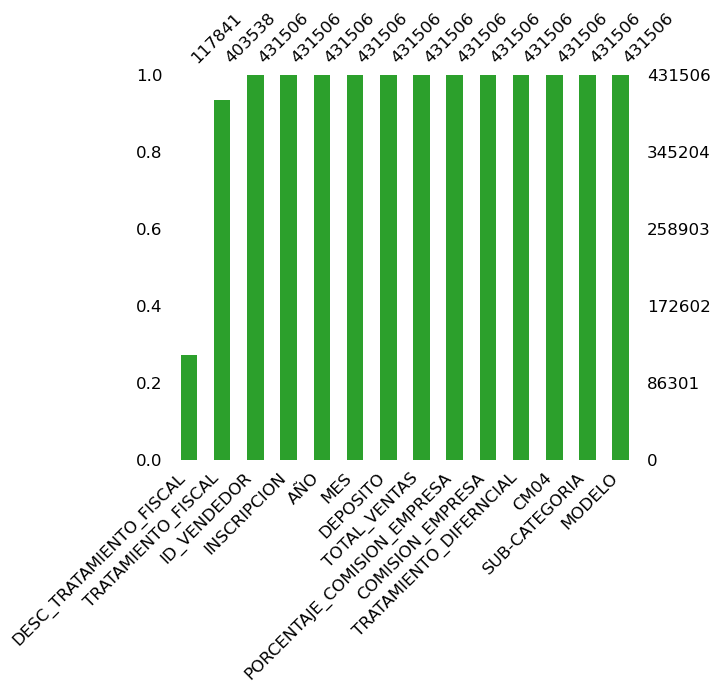

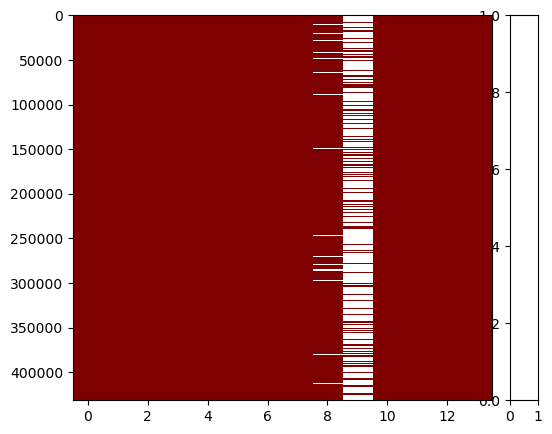

In [34]:
msno.bar(ventas_clean.sort_values('ID_VENDEDOR'), sort="ascending", fontsize=12, color="tab:green", figsize=(6, 5))
msno.matrix(ventas_clean.sort_values('ID_VENDEDOR'), fontsize=12, color=[0.5,0,0], figsize=(6, 5))
msno.heatmap(ventas_clean.sort_values('ID_VENDEDOR'), fontsize=12, figsize=(6, 5))

plt.show()

---
# Simplificación

### Simplificación de variables

In [35]:
# Se reacomodan las columnas deliberadamente
ventas_clean = ventas_clean[['ID_VENDEDOR', 'INSCRIPCION', 'SUB-CATEGORIA', 
                             'DESC_TRATAMIENTO_FISCAL', 'TRATAMIENTO_FISCAL',
                             'TRATAMIENTO_DIFERNCIAL', 'CM04', 'AÑO', 'MES', 
                             'DEPOSITO', 'TOTAL_VENTAS', 
                             'PORCENTAJE_COMISION_EMPRESA', 
                             'COMISION_EMPRESA', 'MODELO']]
ventas_clean = ventas_clean.sort_values(['AÑO', 'MES', 'TOTAL_VENTAS']).reset_index(drop=True)

Ejecutar sólo para escribir el diccionario. 
No debería ser necesario porque ya lo tenemos como json por fuera, pero queda para registro.

In [71]:
# Se modifican los nombres de las columnas

# column_dict = {'ID_VENDEDOR': 'ID', 
#                 'INSCRIPCION': 'Inscripcion', 
#                 'SUB-CATEGORIA': 'Categoria', 
#                 'DESC_TRATAMIENTO_FISCAL': 'Trat_Fisc_Agg', 
#                 'TRATAMIENTO_FISCAL': 'Trat_Fisc', 
#                 'TRATAMIENTO_DIFERNCIAL': 'Trat_Dif', 
#                 'CM04': 'CM', 
#                 'AÑO': 'Año', 
#                 'MES': 'Mes', 
#                 'DEPOSITO': 'Deposito', 
#                 'TOTAL_VENTAS': 'Ventas', 
#                 'PORCENTAJE_COMISION_EMPRESA': 'Alicuota', 
#                 'COMISION_EMPRESA': 'Comision', 
#                 'MODELO': 'Modelo'}

# with open("../../references/column_dict.json", "w") as fp:
#     json.dump(column_dict , fp) 



Renombramos las columnas para mayor legibilidad

In [72]:
with open("../../references/column_dict.json") as column_dict_json:
    column_dict = json.load(column_dict_json)

ventas_clean.rename(columns = column_dict, inplace = True)
ventas_clean.columns

Index(['ID', 'Inscripcion', 'Categoria', 'Trat_Fisc_Agg', 'Trat_Fisc',
       'Trat_Dif', 'CM', 'Año', 'Mes', 'Deposito', 'Ventas', 'Alicuota',
       'Comision', 'Modelo'],
      dtype='object')

### Simplificación de valores

In [73]:
ven_cln_map = ventas_clean.copy()

#### Mapeos de string/entero a otros enteros: generación de variables indicadoras

In [74]:
# Mapeo de `ID`, `Inscripcion` y `Deposito` a enteros según cardinalidad
for col in ['Deposito', 'ID', 'Inscripcion']:
    print(f'Actualizando variable {col}')
    valunico = ven_cln_map[col].unique()
    porc10 = int(0.1 * len(valunico))
    prog = 0
    for v in range(len(valunico)):
        ven_cln_map[col] = ven_cln_map[col].replace({valunico[v]: v})
        if v % porc10 == 0:
            print(f'\t Progreso del {prog}%')
            prog += 10

Actualizando variable Deposito
	 Progreso del 0%
	 Progreso del 10%
	 Progreso del 20%
	 Progreso del 30%
	 Progreso del 40%
	 Progreso del 50%
	 Progreso del 60%
	 Progreso del 70%
	 Progreso del 80%
	 Progreso del 90%
	 Progreso del 100%
Actualizando variable ID
	 Progreso del 0%
	 Progreso del 10%
	 Progreso del 20%
	 Progreso del 30%
	 Progreso del 40%
	 Progreso del 50%
	 Progreso del 60%
	 Progreso del 70%
	 Progreso del 80%
	 Progreso del 90%
	 Progreso del 100%
Actualizando variable Inscripcion
	 Progreso del 0%
	 Progreso del 10%
	 Progreso del 20%
	 Progreso del 30%
	 Progreso del 40%
	 Progreso del 50%
	 Progreso del 60%
	 Progreso del 70%
	 Progreso del 80%
	 Progreso del 90%
	 Progreso del 100%


In [75]:
# Mapeo de `CM` según "Si" >> 1 y "No" >> 0.
ven_cln_map['CM'] = ven_cln_map['CM'].replace({'No': 0, 'Si': 1})


In [76]:
for col in ['Deposito', 'ID', 'Inscripcion']:
    print(f'Variable {col}')
    print(ven_cln_map[col].unique())

Variable Deposito
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240]
Var

#### Unificacón y simplificación de categorías de `Trat_Fisc`

In [90]:
with open("../../references/trat_fisc_dict.json") as trat_fisc_dict_json:
    trat_fisc_dict = json.load(trat_fisc_dict_json)
    
ven_cln_map['Trat_Fisc'] = ven_cln_map['Trat_Fisc'].replace(trat_fisc_dict)

#### Simplificación de categorías de `Trat_Fisc_Agg`, `Trat_Dif` y `Categoria`

In [93]:
with open("../../references/trat_fisc_agg_dict.json") as trat_fisc_agg_dict_json:
    trat_fisc_agg_dict = json.load(trat_fisc_agg_dict_json)

ven_cln_map['Trat_Fisc_Agg'] = ven_cln_map['Trat_Fisc_Agg'].replace(trat_fisc_agg_dict)

In [99]:
with open("../../references/trat_diff_dict.json") as trat_diff_dict_json:
    trat_diff_dict = json.load(trat_diff_dict_json)

ven_cln_map['Trat_Dif'] = ven_cln_map['Trat_Dif'].replace(trat_diff_dict)

In [102]:
categoria_dict = {'Acopio de Cereales, Semillas, Fertilizantes, Granos y afines': 'Acopio Agrop.',
                'Cigarrillos, tabacos y afines': 'Tabaco',
                'Fraccionamiento y distribución de gas licuado': 'Gas Licuado',
                'Instalación, Mantenimiento, Reparación, etc de productos varios': 'Mantenimiento',
                'Supermercados, Hipermercados, Kioscos y afines': 'Supermercados',
                'Venta de Autos, Camionetas, Motos, y Afines': 'Vehiculos',
                'Venta de Artículos, productos, accesorios, etc de diversos materiales': 'Misceláneo',
                'Venta de Combustibles para reventa (Incluye tmb gas, carbón, leña, etc)': 'Comb. Reventa',
                'Venta de Cereales y afines': 'Cerales',
                'Venta de Combustibles de Producción Propia (Incluye tmb gas, carbón, leña, etc)': 'Comb. Prod.Propia',
                'Venta de Combustibles (Incluye tmb gas, carbón, leña, etc)': 'Comb.',
                'Venta de Combustibles Ley 23966 (Incluye tmb gas, carbón, leña, etc)': 'Comb. Ley',
                'Venta de Productos Pecuarios, Veterinarios y similares': 'Veterinarios',
                'Venta de Productos farmacéuticos, de perfumería, cosméticos y similares': 'Farmacia',
                'Venta de Semillas, Fertilizantes, Granos y afines': 'Venta Agrop.',
                'Venta de Productos Alimenticios, Bebidas, Lácteos y afines': 'Gondola',
                'Venta en Comisión, Consignación o Intermediación de Cereales': 'Com. Cerales',
                'Venta en Comisión, Consignación o Intermediación de Productos Varios': 'Com. Varios',
                'Venta en Comisión, Consignación o Intermediación de Ganado': 'Com. Ganado',
                'Venta no realizada en Establecimientos (si en Puestos móviles)': 'Venta movil',
                'Venta por Correo, Internet, tv, etc': 'Comunicacion'}

with open("../../references/categoria_dict.json", "w") as fp:
    json.dump(categoria_dict , fp) 

In [104]:
with open("../../references/categoria_dict.json") as categoria_dict_json:
    categoria_dict = json.load(categoria_dict_json)

ven_cln_map['Categoria'] = ven_cln_map['Categoria'].replace(categoria_dict)

### Justificación

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

fig.suptitle('Efectos del mapeo de variables')

axs[0, 0].scatter(ventas_clean['ID'], ventas_clean['Inscripcion'])
axs[0, 1].scatter(ven_cln_map['ID'], ven_cln_map['Inscripcion'])

axs[1, 0].scatter(ventas_clean['ID'], ventas_clean['Deposito'])
axs[1, 1].scatter(ven_cln_map['ID'], ven_cln_map['Deposito'])

axs[0, 0].set_title('Antes')
axs[0, 1].set_title('Ahora')

axs[0, 0].set_ylabel('Inscripcion')
axs[1, 0].set_ylabel('Deposito')
axs[1, 0].set_xlabel('ID')
axs[1, 1].set_xlabel('ID')

plt.show()

---
# Guardado del dataset

In [105]:
# Descomentar sólo cuando se desee guardar

ven_cln_map.to_csv('../../data/interim/ven_cln_map.csv')